<a href="https://colab.research.google.com/github/Lalo1005/eduardo-git/blob/master/Machine_Learning_Optimizacion_de_modelos_con_hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Aula 01 - Hiper parámetros, Optimización y overfit**

Vamos a trabajar con información de vehículos o carros, lo que tenemos aquí son características de los vehículos como precio, edad del modelo o kilómetros recorridos por año. Estas son las características o los features de nuestros datos y tenemos la variable vendido con valores 1 y 0, 1 es un vehículo que fue vendido y 0 es un vehículo que no fue vendido.

In [2]:
import pandas as pd

datos = pd.read_csv("carros.csv")
datos.head()

,precio,vendido,edad_del_modelo,km_by_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


Generalmente los datos no son extraídos por nosotros mismos, es otra área que extrae estos valores y nos repasa a nosotros para poder crear un modelo encima de estos datos. Y generalmente estos datos están desordenados, es decir los valores que tenemos que predecir de si el vehículo fue vendido o no, no están en un formato aleatorio, sino que están en el peor de los casos están todos los vehículos que no fueron vendidos al inicio, y los pocos registros con los vehículos vendidos, al final.

Entonces el segundo paso esto es lo que vamos a realizar, vamos a ordenar de forma decreciente por la columna “vendido”.

In [3]:
#situacion con los datos ordenados de la peor manera
datos_ord = datos.sort_values("vendido", ascending=True)
x_ord = datos_ord[["precio", "edad_del_modelo","km_by_year"]]
y_ord = datos_ord["vendido"]
datos_ord.head()

,precio,vendido,edad_del_modelo,km_by_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


Entonces, esas son nuestras nuevas variables y ahora necesitamos una base, necesitamos saber, cuál es el menor valor posible que conseguimos predecir a través de un modelo, para tener una base para encima de esa base saber si el próximo modelo porque vamos a jugar con varios modelos aquí, vamos a aplicar varios modelos, cuál de los modelos aplicados es mejor que esta base.

Y esta va a hacer el **DummyClassifier**. El DummyClassifier es el modelo por defecto que vamos a aplicar aquí, que nos va a dar una línea base porque es prácticamente un modelo estadístico, prácticamente va a basarse en la cantidad de ceros que existen y en la cantidad de unos que existen, entonces es bastante estadístico.

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier(strategy='stratified')
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [49.79, 53.45]


 Nuestra línea base nos indica que este modelo está entre 49.79 y 53.45, es decir, no es tan bueno que digamos. Pero esta es nuestra base, ahora vamos a mejorar estos valores. El próximo modelo que vamos a aplicar, que ya es un poco más avanzado que DummyClassifier es el modelo de **DecisionTree o árbol de decisiones.**

En el árbol de decisiones, nosotros podemos estudiar mejor las variables utilizando uno de los parámetros, que es el max_depth. En este caso vamos a setearlo a 2. Es decir, vamos a elegir el valor 2, de profundidad 2. Dos tomas de decisiones para saber cuál de estas dos nos da un mejor valor de predicción para este modelo.

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con cross validation, 10 = [73.83, 77.73]


Ahora ya está entre 73 y 77. Observen la diferencia con el modelo Dummy, ya hemos conseguido superar lo básico. Ahora, todavía no estamos optimizando nada, solamente estamos ejecutando modelos con las características o con los parámetros default o los más básicos.

Vamos a adicionar una más, otra categoría, vamos a llamarla de modelo, no está en los datos, pero lo vamos a crear. Y ustedes me preguntarán: **“¿Por qué vamos a crear una nueva variable si solamente podría trabajar con las que ya están ahí?”**

***A veces, cuando el resultado del modelo, del accuracy o la precisión del modelo no pasa de un número, nosotros podemos crear agrupaciones o agregaciones con los datos que sí tenemos y con estas agregaciones, estas agregaciones incluirlas como un nuevo feature dentro de nuestros datos para, tal vez predecir un resultado medio mejor con esta nueva variable.***  

Una variable, una columna que se llame ‘modelo’. Ahora este modelo es nada más que un valor aleatorio encima de los datos que ya existen, en este caso yo voy a utilizar la columna edad_del_modelo y voy adicionarle un valor aleatorio encima de este valor. Vamos a generar una columna aleatoria, vamos a ver lo que tenemos aquí.

Ustedes pueden ver aquí, con valores 18, 24, 14. Ahora esta es una columna categórica, no es ningún valor a predecir. Es un valor que viene de la agrupación de alguna de estas características que ya existían en nuestros datos y que no tiene relación ninguna entre ellas.

In [6]:
#generando datos aleatorios del modelo de carro
np.random.seed(SEED)
datos['modelo'] = datos.edad_del_modelo + np.random.randint(-2, 3, size=10000)
datos.modelo = datos.modelo + abs(datos.modelo.min()) + 1
datos.head()

,precio,vendido,edad_del_modelo,km_by_year,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


Vamos a crear una función, yo la voy a llamar de imprimir_resultados, que es la que me va a traer algunas métricas, algunos kpis, indicadores de mis datos o de mi modelo, por ejemplo, voy a tener la media, la desviación y la voy a imprimir en pantalla cada vez que invoque a esta función.

In [7]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desviacion = results['test_score'].std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

¿Con qué modelo podemos utilizar esta nueva variable que hemos creado? El modelo, la variable modelo. Vamos a utilizar un modelo GroupKFold, que es una validación cruzada también.

[09:55] En esta validación cruzada yo voy a incluir también la agrupación que acabo de realizar, va a utilizar como agrupación, que es otro parámetro, la variable Groups va a utilizar la nueva columna que acabo de crear, la columna modelo de mi dataset datos.

In [8]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


 Muy bien, ahora sí, miren, observen que la accuracy, el resultado final, la precisión es 75.78. Vamos a ver cuánto ya teníamos conseguido aquí, entre 73 y 77. Parece que no ha mejorado mucho, a veces puede mejorar, a veces no, porque estamos usando datos que ya existen. Entonces no tuvo mucho resultado, por lo menos en esta agrupación con el modelo GroupKFold.

**Ahora vamos a aplicar el modelo SVC, que es el Support Vector Machine, también es un buen modelo para poder estimar los resultados de performance de un modelo.**

In [9]:
# GroupKFold en un pipeline con StandardScaler y SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacion',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 76.68
Intervalo [74.28, 79.08]


Esperemos que este modelo, que es un poco más lento, obtenga un mejor performance que los anteriores. El último que teníamos era de 75.78, parece que ya terminó. 76.68, conseguimos mejorar un poco más el performance que con un árbol de decisión, que era el anterior. Sí, es un árbol de decisión.

Ahora el árbol de decisión, hasta aquí ya hemos corrido los modelos más importantes, desde los más básicos hasta los más complejos para nuestros datos de vehículos que tenemos aquí para intentar predecir la variable vendido o la variable, si el carro fue o no fue vendido.

 Ahora sí que ya tenemos las métricas o los indicadores vamos a intentar optimizar nuestros modelos y luego lo máximo que hemos conseguido de performance es el 76.68. Vamos a ver, vamos a trabajar con uno de estos, vamos a trabajar con el árbol de decisión que es este de aquí.

 Puedo imprimir en pantalla en formato gráfico también para poder visualizar el árbol y tal vez entender un poco mejor los parámetros o cómo se comportan los datos en mi árbol, porque simplemente con el resultado no tengo mucha información.

In [10]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


In [11]:
modelo

DecisionTreeClassifier(max_depth=2)

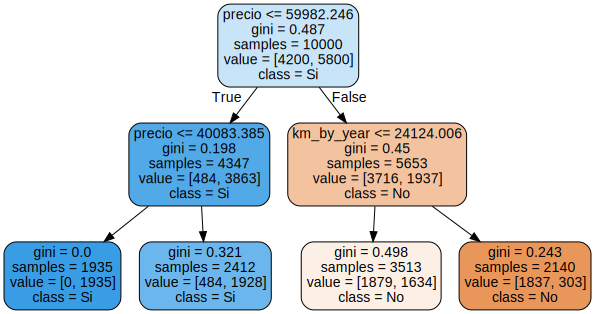

In [12]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)

features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=['No', 'Si'], feature_names=features)
graph = graphviz.Source(dot_data)
graph

Como ustedes pueden ver, me acaba de generar un árbol de decisión de profundidad 2. Estas son las profundidades, 1, 2, o las tomas de decisión y el último nivel, simplemente son las hojas.

In [13]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 78.67
Intervalo [76.40, 80.94]


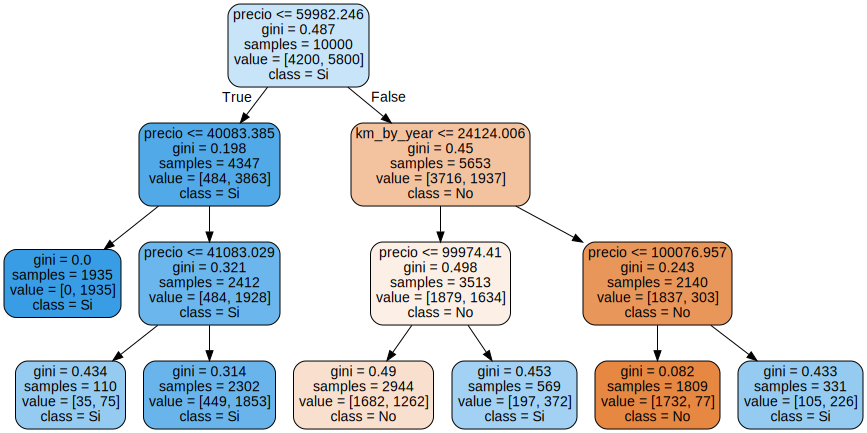

In [14]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)

features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=['No', 'Si'], feature_names=features)
graph = graphviz.Source(dot_data)
graph

Podemos colocar los valores que creamos mejores para alguno de estos parámetros. Uno de estos parámetros es el max_depth que es la profundidad. Nosotros podemos elegir la profundidad que va a tener nuestro árbol de decisión. Actualmente hemos utilizado 2.

Pero yo les digo, ¿qué pasaría si yo colocara en lugar de 2, 3? Vamos a copiar todo este modelo, vamos a al final y le voy a cambiar el tamaño, voy a diseñar una nueva línea de código y le voy a cambiar el tamaño, que es uno de los parámetros. Le voy a cambiar a 3, y veamos voy a ejecutar de nuevo y veamos si la precisión mejora. Ahora tenemos una precisión de 78.67 ¿Recuerdan cuánto era la anterior?

Era 75. Miren, cómo ha mejorado nuestro modelo. Son simplemente cambiando la profundidad.

***Señores, no porque coloquemos el parámetro 10 o aumentemos la profundidad, significa que nuestra precisión de nuestro modelo va a mejorar también. No, no es así cómo se comportan los datos. Llega un momento en que pierdes precisión. Entonces a esto mis amigos es a lo que me refiero, en optimizar un modelo.***

#**Probando Parámetros**

Así es amigos. Ese max_depth es un parámetro y no es el único que tenemos para el árbol de decisión. Si revisamos la documentación, tenemos muchos más parámetros donde podremos colocar algún valor específico y obtendremos un resultado diferente para cada uno de ellos.

Estos valores, estos parámetros que se colocan antes de entrenar un modelo, reciben el nombre de hiper parámetros, son valores que podemos configurar antes de entrenar un modelo para obtener alguna decisión.

Ahora, durante el modelo se generan parámetros también internos del modelo que van realizando cálculos específicos de acuerdo a los hiper parámetros que colocamos.

Estos valores no son hiper parámetros estos valores que el modelo calcula se le llaman parámetros. Entonces existen esas diferencias. Hiper parámetros antes del entrenamiento. Nosotros lo colocamos. Y parámetros son los valores resultantes del modelo resultantes del entrenamiento.

In [15]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
  imprime_resultados(results)

iniciar_arbol_de_decision(3)

Accuracy media 78.67
Intervalo [76.40, 80.94]


Y así mis amigos podemos colocarle cualquier valor de profundidad y tendremos el resultado de esta función, pero esta **¿es una forma de probar parámetros?**

**No.**   Solo les estoy mostrando cómo una profundidad o un parámetro o un hiper parámetro diferente, nos devuelve una precisión diferente también. Entonces, para saber cuál de estos valores para este parámetro o hiper parámetro que es el max_depth es el mejor para nuestro modelo vamos a crear un for para saber cuál profundidad es la mejor para nosotros.

In [16]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
  test_score = results['test_score'].mean()*100
  print('Arbol max_depth = %d, testing= %.2f' % (max_depth, test_score))

for i in range(1,33):
  iniciar_arbol_de_decision(i)

Arbol max_depth = 1, testing= 75.78
Arbol max_depth = 2, testing= 75.78
Arbol max_depth = 3, testing= 78.67
Arbol max_depth = 4, testing= 78.63
Arbol max_depth = 5, testing= 78.56
Arbol max_depth = 6, testing= 78.12
Arbol max_depth = 7, testing= 77.96
Arbol max_depth = 8, testing= 77.86
Arbol max_depth = 9, testing= 77.38
Arbol max_depth = 10, testing= 77.19
Arbol max_depth = 11, testing= 76.97
Arbol max_depth = 12, testing= 76.49
Arbol max_depth = 13, testing= 75.81
Arbol max_depth = 14, testing= 75.66
Arbol max_depth = 15, testing= 75.16
Arbol max_depth = 16, testing= 75.11
Arbol max_depth = 17, testing= 74.74
Arbol max_depth = 18, testing= 74.33
Arbol max_depth = 19, testing= 74.34
Arbol max_depth = 20, testing= 74.22
Arbol max_depth = 21, testing= 73.80
Arbol max_depth = 22, testing= 73.81
Arbol max_depth = 23, testing= 73.38
Arbol max_depth = 24, testing= 73.43
Arbol max_depth = 25, testing= 73.14
Arbol max_depth = 26, testing= 73.04
Arbol max_depth = 27, testing= 72.91
Arbol max_

A ver, cuanto más decisiones tenga el árbol, cuanto más profundo sea, mejor debería ser el resultado de nuestra prueba, de nuestro testing, y esto no está ocurriendo. Comenzó a aprender bien y luego comenzó a olvidarse, o algo así. Bueno, esto puede suceder por varias razones, pero ¿por qué debería aprender más cuanto más profundo?

Porque, a ver, yo les digo. En el max_depth = 1, el árbol solamente toma una decisión para saber si el carro se va a vender o no. Por ejemplo, si tengo dinero, el carro se vende, si no tengo dinero, el carro no se vende. Una única decisión, un único factor. Tengo o no tengo dinero, ¿pero qué pasa si tengo dinero pero no tengo ganas de comprar?

Entonces también tengo que evaluar si tengo dinero y si tengo ganas, entonces ya son dos decisiones. Mi modelo va a ser mejor cuando considere ambas, ¿pero qué pasa si tengo dinero, tengo ganas, pero no sé manejar, por ejemplo? Entonces dos decisiones ya no son suficientes. Ahora necesito evaluar tres decisiones.

**Entonces, cuanto más informaciones tenga, cuanto más inteligente o más profundo sea mi árbol, entonces estaré más preparado para tomar una mejor decisión en mis datos de prueba, en mis datos de test. Por eso que un árbol más profundo es un árbol más inteligente. Pero no está sucediendo esto aquí. ¿Por qué?**

Nuestros datos han entrenado tan bien que se han aprendido el entrenamiento, pero no están preparados para el mundo real, para los datos reales, para el escenario real.

A esto mis amigos le llamamos ***overfitting*** y es un concepto que vamos a aprender a entender y a resolver

Ahora, **¿cómo sabemos o cómo sabremos si nuestro modelo está de frente o está enfrentándose a un overfitting?** Para esto tenemos que traer también en pantalla, tenemos que mostrar el resultado de nuestros datos de entrenamiento.

# **Explorando hiper parámetros en una dimensión**

In [17]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print('Arbol max_depth = %d, training = %.2f, testing= %.2f' % (max_depth, train_score, test_score))
  # Los 3 valores dentro de una lista
  tabla = [max_depth, train_score, test_score]
  return tabla

# List comprehension

resultados = [iniciar_arbol_de_decision(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns=['max_depth', 'train', 'test'])
resultados.head(10)


Arbol max_depth = 1, training = 75.79, testing= 75.78
Arbol max_depth = 2, training = 75.79, testing= 75.78
Arbol max_depth = 3, training = 78.75, testing= 78.67
Arbol max_depth = 4, training = 78.79, testing= 78.63
Arbol max_depth = 5, training = 78.94, testing= 78.56
Arbol max_depth = 6, training = 79.17, testing= 78.12
Arbol max_depth = 7, training = 79.50, testing= 77.96
Arbol max_depth = 8, training = 79.89, testing= 77.86
Arbol max_depth = 9, training = 80.46, testing= 77.38
Arbol max_depth = 10, training = 81.16, testing= 77.19
Arbol max_depth = 11, training = 82.03, testing= 76.97
Arbol max_depth = 12, training = 82.89, testing= 76.49
Arbol max_depth = 13, training = 83.95, testing= 75.81
Arbol max_depth = 14, training = 85.03, testing= 75.66
Arbol max_depth = 15, training = 86.14, testing= 75.16
Arbol max_depth = 16, training = 87.19, testing= 75.11
Arbol max_depth = 17, training = 88.31, testing= 74.74
Arbol max_depth = 18, training = 89.26, testing= 74.33
Arbol max_depth = 1

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185
7,8,79.887810,77.857951
8,9,80.459009,77.376956
9,10,81.158994,77.194204


 Como ustedes pueden ver, ya lo habíamos visto en el video anterior, los datos de prueba, los datos finales de ejecución real en un escenario real van aprendiendo y al final terminan disminuyendo. Pero miren lo que sucede con el dato de entrenamiento. El dato de tratamiento va aprendiendo y mejorando cada vez más, cuanto más profundo el árbol, mejor mis datos de entrenamiento.

[04:21] Llega hasta un porcentaje de 98%, casi perfecto, correcto, pero en contrapartida mis datos de prueba disminuyeron bastante, un 72%. Entonces parece sí que estamos enfrentando un problema de overfit. Ahora, estos datos ya no solamente están en pantalla, se acaban de guardar en un DataFrame, como ustedes pueden ver.

# **Overfit**

***Creando un gráfico de líneas***

Como ustedes pueden ver, ya lo habíamos visto en el video anterior, los datos de prueba, los datos finales de ejecución real en un escenario real van aprendiendo y al final terminan disminuyendo. Pero miren lo que sucede con el dato de entrenamiento. El dato de tratamiento va aprendiendo y mejorando cada vez más, cuanto más profundo el árbol, mejor mis datos de entrenamiento.**Ahora para ver un overfitting necesitamos visualizarlo de una forma gráfica que es mucho más fácil de entender. Entonces para esto vamos a importar nuestra biblioteca seaborn as sns, que es la convención normal y vamos a crear un gráfico de líneas para esto es lineplot.**

<Axes: xlabel='max_depth', ylabel='train'>

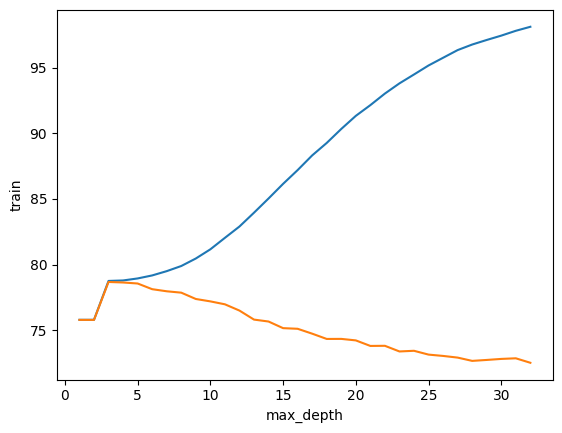

In [18]:
import seaborn as sns
sns.lineplot(x='max_depth', y='train', data=resultados)
sns.lineplot(x='max_depth', y='test', data=resultados)

 ¿Qué tenemos aquí? Podemos ver que la línea azul representa al dato de entrenamiento, y línea naranja representa los datos de test. Entonces, como podemos ver, los datos prácticamente coinciden al inicio, tienen el mismo porcentaje, la misma performance. Pero conforme el árbol se va profundizando, ustedes pueden ver aquí, pasa de 5 a 10, 15, 20, es decir, el árbol se vuelve más complejo, aprende más, tiene más informaciones, más reglas, más decisiones. ¿Qué pasa con el entrenamiento?

Aumenta la performance o la precisión va aumentando, ¿pero qué pasa con el dato, con los datos de test, o sea, los datos de prueba? Van disminuyendo. Quiere decir que va perdiendo precisión. En este caso, mis amigos, sí realmente estamos viendo un overfitting. ***Overfitting es esto, los datos aprenden tanto del entrenamiento que al final de cuentas solo sirve para el entrenamiento.***

**No consigue asimilar nuevas reglas que vienen del escenario real donde vamos a colocar nuestro modelo para ejecutar, no consigue asimilar o aprender nuevas reglas, simplemente sabe lo que le enseñamos y ya está. Entonces esto sí es un overfitting.**

**Colores equivocados en la leyenda en grafico con seaborn**

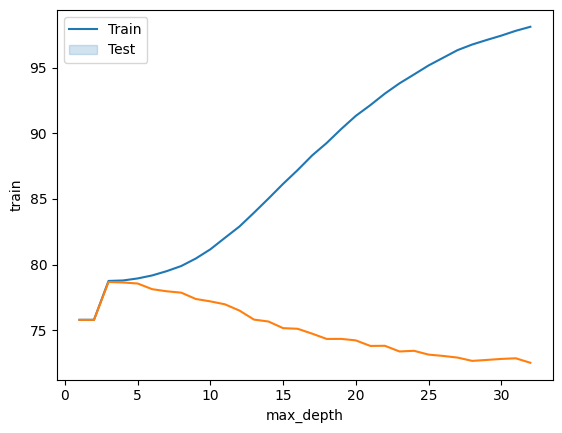

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='max_depth', y='train', data=resultados)
sns.lineplot(x='max_depth', y='test', data=resultados)

plt.legend(['Train', 'Test'])

Siguen equivocados pese a ser más precisos con el color.

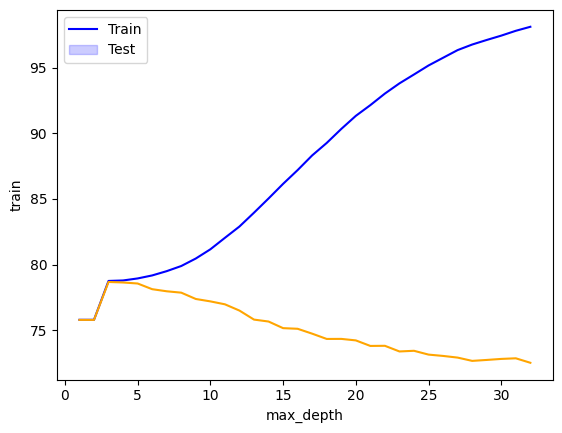

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='max_depth',y='train',data=resultados,color='blue',label='Train')
sns.lineplot(x='max_depth',y='test',data=resultados,color='orange',label='Test')

plt.legend(['Train', 'Test'])

Sin necesidad de ser tan precisos los mostro como debe ser solo  con label.

<Axes: xlabel='max_depth', ylabel='train'>

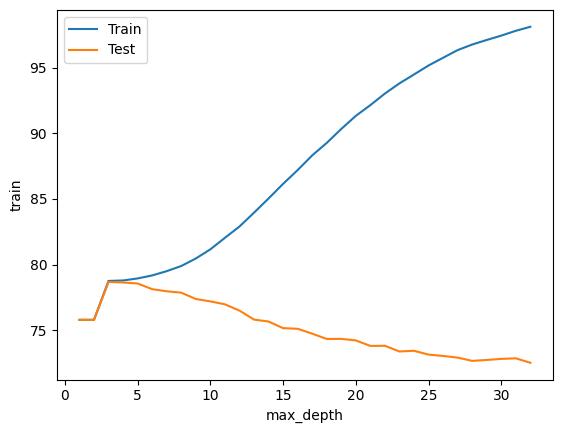

In [21]:
import seaborn as sns
sns.lineplot(x='max_depth',y='train',data=resultados,label='Train')
sns.lineplot(x='max_depth',y='test',data=resultados,label='Test')


Entonces mis amigos, esto es un overfit y esto es lo que tenemos que evitar. Tenemos que aprender a partir de este momento cómo tratar este tipo de datos.

In [22]:
resultados.sort_values('test', ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


Y hasta ordenado por precisión, de mayor a menor. Entonces la mejor precisión para nuestros datos de prueba fue el árbol con profundidad 3.

[09:42] Obtuvimos un 78.67, mejor que cualquier otra profundidad. Entonces, cuando ustedes me preguntaban, ¿cuanto más profundo un árbol, mejor? Depende, va a ser mejor para los datos de entrenamiento, pero si no es mejor para el dato de prueba, para el dato real, entonces estamos viendo un overfitting.

# **Aula 02.-Explorando 2 dimensiones de hiper parámetros**

# **02 Espacio de parámetros de dos dimensiones**

**“¿Qué es un espacio de parámetro?”** Bueno, un espacio de parámetros son los distintos valores que puede asumir un parámetro o un hiper parámetro de nuestro modelo. ¿Recuerdan lo que era un hiper parámetro?

Nosotros habíamos trabajado con el max_depth para nuestro árbol de decisión. Ese es un hiper parámetro, ***el espacio de parámetros serían los distintos valores que podría asumir max_depth.***

Cada profundidad o cada valor del max_depth nos indicaba más profundidad en nuestro árbol y cuanto más profundo, más complejo, más reglas y mejor debería prevenir o predecir mejor dicho, los valores, la precisión de nuestro modelo. Entonces, por eso es importante recorrer todos los espacios de un hiper parámetro para saber cuál de estos aquí es el mejor y cuál está mejor preparado para los datos de prueba.

Ahora eso es un hiper parámetro, eso es recorrer el espacio de parámetros de uno de ellos. ¿Pero qué sucedería si yo tuviera dos? A ver ¿qué otros hiper parámetros tenemos para un árbol de decisión? Además del max_depth, que ya lo hemos trabajado. Tenemos, por ejemplo, el min_samples_leaf, que son el mínimo de ejemplos, o el mínimo de samples para una hoja, aquí, en nuestro mismo gráfico.

Ahora, si ustedes pueden ver aquí cada una de estas hojas tiene una cantidad de samples, es decir una cantidad de registros que fueron evaluados, en este caso fue 110, en esta otra fueron 2302, ¿ahora qué sucedería si los samples aquí en estos nodos finales o en estas hojas fuera una unidad, un único registro?

Sería muy específico, muy pero muy específico, nuestro árbol de decisión. Tendría que suceder exactamente esa única ocurrencia para que el árbol pueda tomar una decisión y con esto estaríamos dificultando que puede adaptarse a más registros, a más ocurrencias, que estaría dificultando el aprendizaje.

Tendríamos que también recorrer el espacio de parámetros. Así como hicimos con max_depth que lo recorrimos del 1 hasta el 32 o hasta el 64, por ejemplo, puedo colocar hasta 64 para saber cuál de ellos podría darme el mejor valor de precisión. Tendría que hacer lo mismo con el min_samples_leaf, tendría que recorrerlo del 1 al 64.



Pero ya no solo tendría que recorrerlo individualmente, tendría que hacer la intersección con el max_depth, porque ahora tendría dos hiper parámetros. Es decir, tendría que hacer una combinación de 64 veces o por 64.

In [23]:
for x in range(1, 64):
  for y in range(1, 64):
    print('max_depth: ' + str(x)  , '-min_depth_leaf: ' + str(y))

max_depth: 1 -min_depth_leaf: 1
max_depth: 1 -min_depth_leaf: 2
max_depth: 1 -min_depth_leaf: 3
max_depth: 1 -min_depth_leaf: 4
max_depth: 1 -min_depth_leaf: 5
max_depth: 1 -min_depth_leaf: 6
max_depth: 1 -min_depth_leaf: 7
max_depth: 1 -min_depth_leaf: 8
max_depth: 1 -min_depth_leaf: 9
max_depth: 1 -min_depth_leaf: 10
max_depth: 1 -min_depth_leaf: 11
max_depth: 1 -min_depth_leaf: 12
max_depth: 1 -min_depth_leaf: 13
max_depth: 1 -min_depth_leaf: 14
max_depth: 1 -min_depth_leaf: 15
max_depth: 1 -min_depth_leaf: 16
max_depth: 1 -min_depth_leaf: 17
max_depth: 1 -min_depth_leaf: 18
max_depth: 1 -min_depth_leaf: 19
max_depth: 1 -min_depth_leaf: 20
max_depth: 1 -min_depth_leaf: 21
max_depth: 1 -min_depth_leaf: 22
max_depth: 1 -min_depth_leaf: 23
max_depth: 1 -min_depth_leaf: 24
max_depth: 1 -min_depth_leaf: 25
max_depth: 1 -min_depth_leaf: 26
max_depth: 1 -min_depth_leaf: 27
max_depth: 1 -min_depth_leaf: 28
max_depth: 1 -min_depth_leaf: 29
max_depth: 1 -min_depth_leaf: 30
max_depth: 1 -min_d

 Si ya con esta primera me demoraba 5 horas y media, recuerdan el cálculo que hicimos en el video anterior, si yo hago 64 veces 64, cinco minutos cada prueba, aquí lo vamos a visualizar mejor, voy a ejecutar esto de aquí. Si yo tuviera que recorrer 64 valores de cada uno de ellos, intersectando a su vez, cada uno de estos valores, el max_depth 1 con el min_depth 1, el max_depth 1 con el min_depth dos, el max_depth 1 con el min_depth 3 y así hasta haber recorrido los 64 por 64.

Según los cálculos, cada uno de estos test nos llevaría unos 5 minutos en unos datos más complejos, que no es nuestro caso, pero imaginemos que nos lleve 5 minutos. Para recorrer todas las 64 por 64 combinaciones nos llevaría aproximadamente unos 14 días para recorrer

# **Explorando hiper parámetros de más dimensiones**

Prácticamente solamente tenemos que adecuar nuestra función en lugar de solamente incluir como parámetro el max_depth, vamos a incluir también el otro, hiper parámetro, el min_samples_leaf.

Entonces, mientras el max_depth va a asumir los valores o las profundidades o los espacios de parámetros del 1 al 32, el min_samples_leaf solamente asumirá cuatro valores. Entonces vamos a tener 32 veces, cuatro, 128, entonces va a ser una búsqueda más rápida. Veamos si es así. Ahora ejecutamos nuevamente nuestra función. Y veamos, se está ejecutando.

***Esto sería una forma, un método de ustedes, ejecutar o recorrer los espacios de parámetros de dos hiper parámetros de una manera más simple, más sencilla y más rápida. Siempre tenemos que optimizar nuestro algoritmo.***

In [32]:
# No ejecutar!!!!!!
def iniciar_arbol_de_decision(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print('Arbol max_depth = %d, min_samples_leaf %d, training = %.2f, testing= %.2f' % (max_depth, min_samples_leaf, train_score, test_score))
  # Los 3 valores dentro de una lista
  tabla = [max_depth, min_samples_leaf, train_score, test_score]
  return tabla

def buscar():
  resultados = []
  for max_depth in range(1,32):
    for min_samples_leaf in [32, 64, 128, 256]:
      # ejecutamos estos dos valores y lo guardamos en nuestra lista tabla
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      # Después vamos a guardar los resultados de esta tabla en mi nueva lista resultados.
      resultados.append(tabla)
      # Entonces tenemos una lista de lista. Vamos a salir del bucle y la vamos a convertir en una DataFrame.
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_sample_leaf', 'train', 'test'])
  return resultados
resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf 32, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 64, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 128, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 256, training = 75.79, testing= 75.78
Arbol max_depth = 2, min_samples_leaf 32, training = 75.79, testing= 75.78
Arbol max_depth = 2, min_samples_leaf 64, training = 75.79, testing= 75.78
Arbol max_depth = 2, min_samples_leaf 128, training = 75.79, testing= 75.78
Arbol max_depth = 2, min_samples_leaf 256, training = 75.79, testing= 75.78
Arbol max_depth = 3, min_samples_leaf 32, training = 78.75, testing= 78.67
Arbol max_depth = 3, min_samples_leaf 64, training = 78.75, testing= 78.67
Arbol max_depth = 3, min_samples_leaf 128, training = 78.75, testing= 78.67
Arbol max_depth = 3, min_samples_leaf 256, training = 78.75, testing= 78.67
Arbol max_depth = 4, min_samples_leaf 32, training = 78.75, testing= 78.67
Arbol max_depth = 4

KeyboardInterrupt: ignored

Ahora ustedes me preguntarán: “¿vamos a ver el resultado de estos dos hiper parámetros?” Vamos a ordenar nuestro DataFrame. Yo ya trabaje aquí la función más rápida ordenado por la columna de prueba que es eso de aquí, la columna test, lo que nos interesa al final de una forma descendiente para saber los mejores resultados.

In [24]:
resultados.sort_values('test', ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


Es decir, la combinación que mejor resultado o performance nos trajo. Como ustedes pueden ver aquí, nos está mostrando la mejor combinación, la verdad estas 5 tuvieron el mismo performance para las combinaciones, nos está trayendo el valor igual y las combinaciones simplemente el max_depth era de profundidad 3 y el min_samples_leaf de 256 a 32.

Esta primera ya nos servía como resultado final para optimizar nuestro modelo.

**Ahora ustedes me preguntarán: “¿cómo yo voy a saber si quería, si yo no podría obtener un mejor valor dentro de unos valores que yo no seleccioné para el min_sample_leaf, porque el min_sample_leaf solamente tiene cuatro valores, 32, 64, 128 y 256. No estoy indicándole nuevos valores aparte de este.¿Y qué sucedería si dentro de alguno de estos valores que yo no seleccioné obtuviese un mejor resultado para mi modelo?**


***Pero nosotros tenemos que encontrar la mejor manera de saber cuáles valores podemos colocar en nuestra lista, y para eso existe un método llamado matriz de correlación.***

# **04 Matriz de correlación y explorando más espacios de parámetros**

E el video anterior aprendimos a recorrer el espacio de parámetros de dos hiper parámetros. El problema es que tuvimos que recortar algunos valores de mi segundo hiper parámetro, el min_samples_leaf, para que nuestro algoritmo sea más rápido.

Entonces la duda era si escogimos los valores correctos para mi hiper parámetro min_samples_leaf. ¿Qué pasa si es que dejé de escoger algún valor que me traía mejor precisión de los que yo obtuve con los valores seleccionados? No tengo cómo saberlo porque no recorrí ese espacio, solamente recorrí algunos cuantos.

 **La matriz de correlación nos va a ayudar a tener una mejor idea de dónde se encontrarían la mejor precisión de mi modelo, cuáles valores son los mejores para mi modelo, con cuáles espacios de mis hiper parámetros funciona mejor el modelo. Aquí en pandas ya tenemos una función que nos devuelve la matriz de correlación.**

**Utilizando el método de correlación .corr().**

Ya está por default en Python sólo hay que utilizarla.

**Matriz con Python**

In [25]:
corr = resultados.corr()
corr

,max_depth,train,test
max_depth,1.000000,0.992354,-0.918421
train,0.992354,1.000000,-0.925371
test,-0.918421,-0.925371,1.000000


Por ejemplo, aquí tenemos que la correlación del max_depth, cuanto mayor el max_depth el entrenamiento también será mayor, pero mi prueba, mis datos de prueba o test serán menores. Entonces tenemos una correlación negativa con los datos de prueba.

Y pasa lo contrario con el min_samples_leaf. Ustedes pueden ver que cuanto mayor el min_samples_leaf, menor serán los resultados para mi entrenamiento, pero mejor será la performance o la precisión de mis datos de prueba, de mis datos de test, que en realidad esto es lo que nos interesa.

***¿Hay otra forma de ver esta matriz?*** Hay otra forma también. ***Hay quienes nos gusta de ver los datos en gráfico.*** Entonces, el seaborn, la biblioteca seaborn tiene un mapa de calor, nosotros le llamamos **heatmap.**

Como ya tenemos guardado nuestros datos correlacinandos en la variable corr solo lo aplicamos al método .heatmap().

**Matriz con Heatmap**

<Axes: >

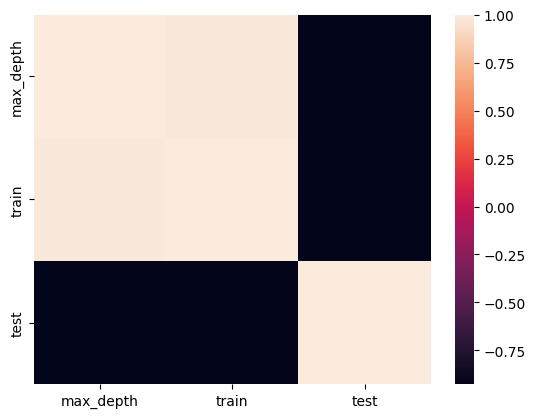

In [26]:
sns.heatmap(corr)

Por ejemplo, cuando el max_depth es mayor, mis datos de entrenamiento son mayores también, pero mis datos de prueba son menores porque el color es más oscuro, entonces esto es menor. Y el min_samples_leaf, lo contrario. Cuanto mayor mis datos de entrenamiento, son menores, pero la precisión de mis datos de prueba son un poquito mejores. Entonces esto es lo mismo que ver en una matriz con Python.

Matriz de correlación importado de la biblioteca Pandas.

Tenemos con pandas a ver, tenemos la biblioteca scatter_matrix, podremos utilizarlo de la siguiente manera, podemos importarla de pandas directamente, simplemente está dentro de la biblioteca plotting. Vamos a importar scatter_matrix, para traer una matriz.

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

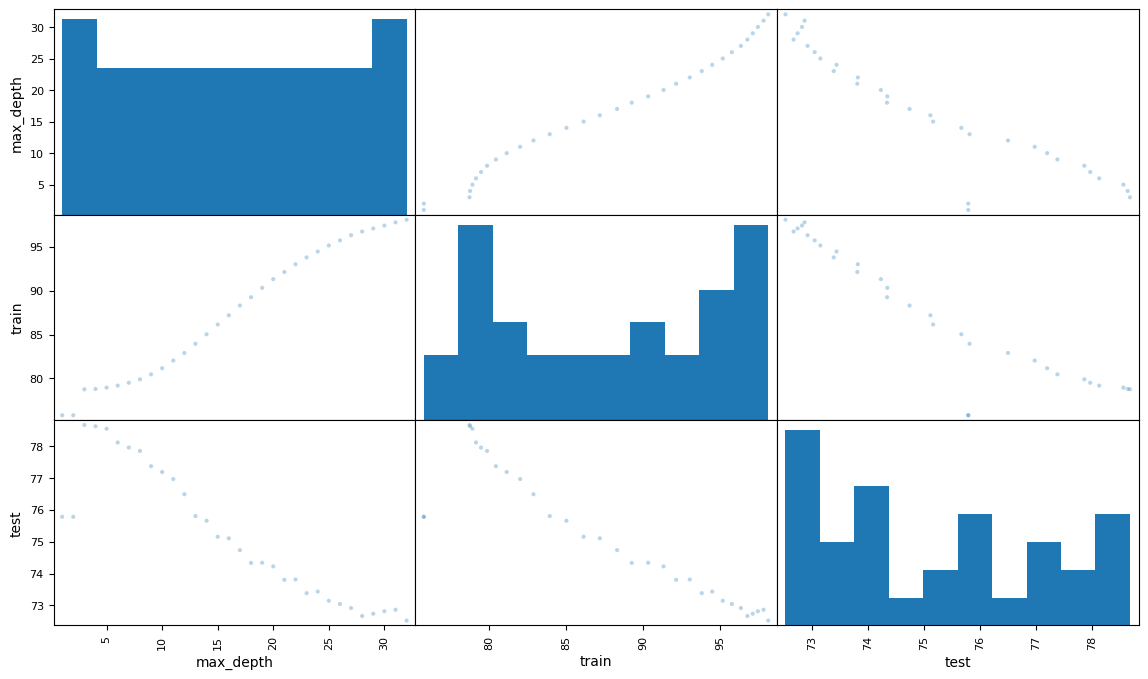

In [27]:
from pandas.plotting import scatter_matrix
# alpha = 0.3 para que se vea un poco más claro.
scatter_matrix(resultados, figsize=(14,8), alpha=0.3)

Es decir, que los datos se acostumbraron mejor al entrenamiento con el max_depth, tiene una correlación positiva. Ahora observen el min_samples_leaf. Cuanto mayor el min_samples_leaf, ¿qué es lo que pasa con los datos de test o los datos de prueba? Cuanto mayor el valor, los datos de prueba es se concentran mejor entre 78, es decir, obtiene una mejor precisión cuando mayor el valor de min_samples_leaf.

Aquí ya tengo una relación o una correlación positiva y sucede lo contrario con los datos de entrenamiento. Entonces, con esta matriz aquí yo ya puedo ver lo siguiente, puedo ver que debería escoger los valores mayores en el min_samples_leaf y los valores menores en el max_depth. Entonces ya sé por dónde debo concentrar mis esfuerzos.

 ¿Ahora existe otro método también para ver esto en lugar del scatter_matrix? El propio seaborn también tiene una biblioteca que me parece es el pairplot. Simplemente tenemos que pasarle nuestros datos, que se traen resultados como parámetro si ejecutamos esto de aquí.

Para mí aquí se ve mejor.

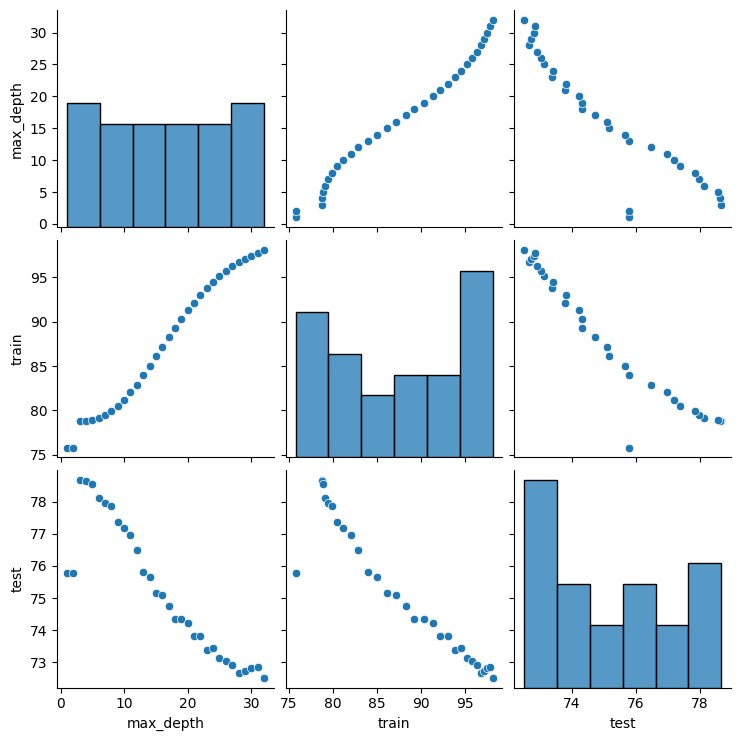

In [28]:
sns.pairplot(resultados)

<Axes: >

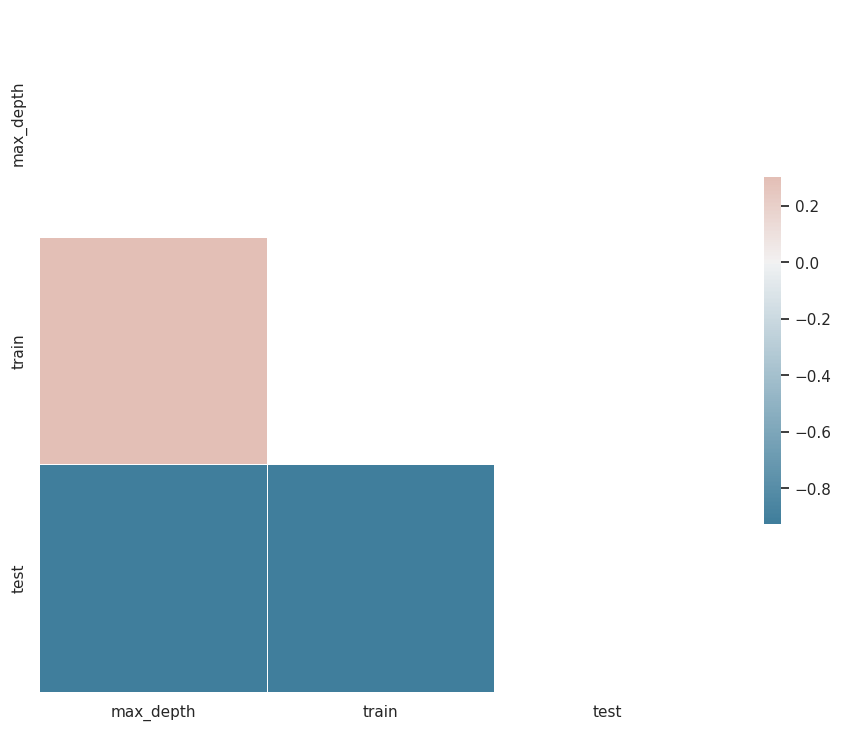

In [29]:
# Seaborn correlation
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100,26)), columns=list(ascii_letters[26:]))

# compute the correlation matrix
#corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})


# compute the generation matrix


Es la misma cosa que obtuvimos en los gráficos anteriores. Ustedes pueden ver aquí que cuanto mayor es más naranja, más marroncito, cuanto más azul es más negativo. Entonces cuanto mayor, por ejemplo, perdón, cuánto menor el valor del min_samples_leaf, mejor son los datos del test y cuanto menor el min_samples_leaf, peor son los datos de entrenamiento.

Entonces, aquí ya puedo ver que mi test va a funcionar bien, para pocos valores del max_depth, pocos valores no, bajos valores del max_depth y altos valores del min_samples_leaf. Entonces esta es la combinación perfecta que nos da una matriz de correlación para saber qué valores colocar en mis hiper parámetros para saber cuáles valores buscar en todo el espacio de parámetros.

In [33]:
def buscar():
  resultados = []
  for max_depth in range(1,10):
    for min_samples_leaf in [128, 190, 220, 256]:
      # ejecutamos estos dos valores y lo guardamos en nuestra lista tabla
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      # Después vamos a guardar los resultados de esta tabla en mi nueva lista resultados.
      resultados.append(tabla)
      # Entonces tenemos una lista de lista. Vamos a salir del bucle y la vamos a convertir en una DataFrame.
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_sample_leaf', 'train', 'test'])
  return resultados
resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf 128, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 190, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 220, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 256, training = 75.79, testing= 75.78
Arbol max_depth = 2, min_samples_leaf 128, training = 75.79, testing= 75.78
Arbol max_depth = 2, min_samples_leaf 190, training = 75.79, testing= 75.78
Arbol max_depth = 2, min_samples_leaf 220, training = 75.79, testing= 75.78
Arbol max_depth = 2, min_samples_leaf 256, training = 75.79, testing= 75.78
Arbol max_depth = 3, min_samples_leaf 128, training = 78.75, testing= 78.67
Arbol max_depth = 3, min_samples_leaf 190, training = 78.75, testing= 78.67
Arbol max_depth = 3, min_samples_leaf 220, training = 78.75, testing= 78.67
Arbol max_depth = 3, min_samples_leaf 256, training = 78.75, testing= 78.67
Arbol max_depth = 4, min_samples_leaf 128, training = 78.75, testing= 78.67
Arbol max_de

,max_depth,min_sample_leaf,train,test
0,1,128,75.791169,75.784219
1,1,190,75.791169,75.784219
2,1,220,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,128,75.791169,75.784219


In [34]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_sample_leaf,train,test
13,4,190,78.750993,78.672633
11,3,256,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,220,78.750993,78.672633
12,4,128,78.750993,78.672633


Recuerden que nuestra matriz de correlación nos había dicho: busca en valores bajos. Aquí el max_depth blanquito significaba valores bajos aquí. A ver si lo podemos ver aquí. Cuanto más bajo, mejor. Y el min_samples_leaf nos indicaba que cuanto más alto, mejor.

[13:08] Veamos cuál fue la mejor combinación. El mas_depth, un valor bajo realmente y el min_samples_leaf, un valor alto entre ese intervalo que nos había indicado en esta matriz de correlación. **Y fue esa la combinación que nos trajo un mejor desempeño de nuestro modelo.** ***Es así cómo nosotros realmente tenemos que buscar dentro de todo el espacio de parámetros de nuestros hiper parámetros, para poder optimizar nuestro modelo.***

[13:34] Tenemos que saber elegir, tenemos que saber interpretar esta matriz de correlación para poder focar nuestro algoritmo. Esto fue dos hiper parámetros. ¿Pero funcionará lo mismo para tres o más y parámetros?

# **Aula 03 - Trabajando con 3 o más dimensiones**

**Explorando 3 ó más hiper parámetros**

Y nos habíamos quedado con la duda si es que este mismo algoritmo iría a funcionar si utilizásemos más de dos, digamos tres hiper parámetros.

Entonces es lo que vamos a hacer el día de hoy.

Entonces vamos a ver aquí, vamos a bajar un poco aquí, en la documentación, existen varios parámetros aquí para escoger, digamos que vamos a utilizar el min_samples_split. El min_samples_split es aquel que divide el nodo o la regla de un árbol de decisión en dos. Recuerdan el árbol de decisión que se divide siempre en dos nodos. ¿Por qué se divide siempre en dos nodos?

Porque aquí la documentación nos explica eso, el valor por default o por defecto es 2. Entonces, siempre que veo un nodo, lo va a dividir en 2. **¿Y qué sucedería si yo dividiese más de dos nodos? ¿El modelo sería mejor? ¿La precisión aumentaría?** Podemos descubrirlo recorriendo todo el espacio de parámetros de este parámetro también.

 Tendremos como resultado nuestro tercer DataFrame, nuestro DataFrame resultados con las tres columnas y sus respectivos indicadores. Ahora si ustedes prestan atención, aquí estamos recorriendo un bucle anidado, primero de 32 valores por cuatro valores del segundo parámetro, por cuatro valores del tercer hiper parámetro, es decir, 32 por 4, por 4, tendremos 512 combinaciones.

Esto puede demorar un poco. Ahora yo sé que nuestros datos son simples, son pequeños, así que no debería demorar mucho.

In [35]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  train_score = results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  # tiempo que demora en realizar el entrenamiento
  fit_time = results['fit_time'].mean()
  # tiempo que demora en realizar la prueba
  score_time = results['score_time'].mean()

  print('Arbol max_depth = %d, min_samples_leaf %d, min_samples_split %d, training = %.2f, testing= %.2f' % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  # Los 3 valores dentro de una lista
  tabla = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabla

def buscar():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        # ejecutamos estos dos valores y lo guardamos en nuestra lista tabla
        tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split)
        # Después vamos a guardar los resultados de esta tabla en mi nueva lista resultados.
        resultados.append(tabla)
      # Entonces tenemos una lista de lista. Vamos a salir del bucle y la vamos a convertir en una DataFrame.
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_sample_leaf', 'min_samples_split', 'train', 'test', 'fit_time', 'score_time'])
  return resultados
resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf 32, min_samples_split 32, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 32, min_samples_split 64, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 32, min_samples_split 128, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 32, min_samples_split 256, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 64, min_samples_split 32, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 64, min_samples_split 64, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 64, min_samples_split 128, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 64, min_samples_split 256, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 128, min_samples_split 32, training = 75.79, testing= 75.78
Arbol max_depth = 1, min_samples_leaf 128, min_samples_split 64, training = 75.79, testing= 75.78
Arbol max_depth = 1, min

,max_depth,min_sample_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.006491,0.002193
1,1,32,64,75.791169,75.784219,0.006099,0.002567
2,1,32,128,75.791169,75.784219,0.006140,0.002342
3,1,32,256,75.791169,75.784219,0.006475,0.002218
4,1,64,32,75.791169,75.784219,0.006752,0.002305


In [43]:
corr = resultados.corr()


<ipython-input-43-a72c37ee41fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = resultados.corr()


<Axes: >

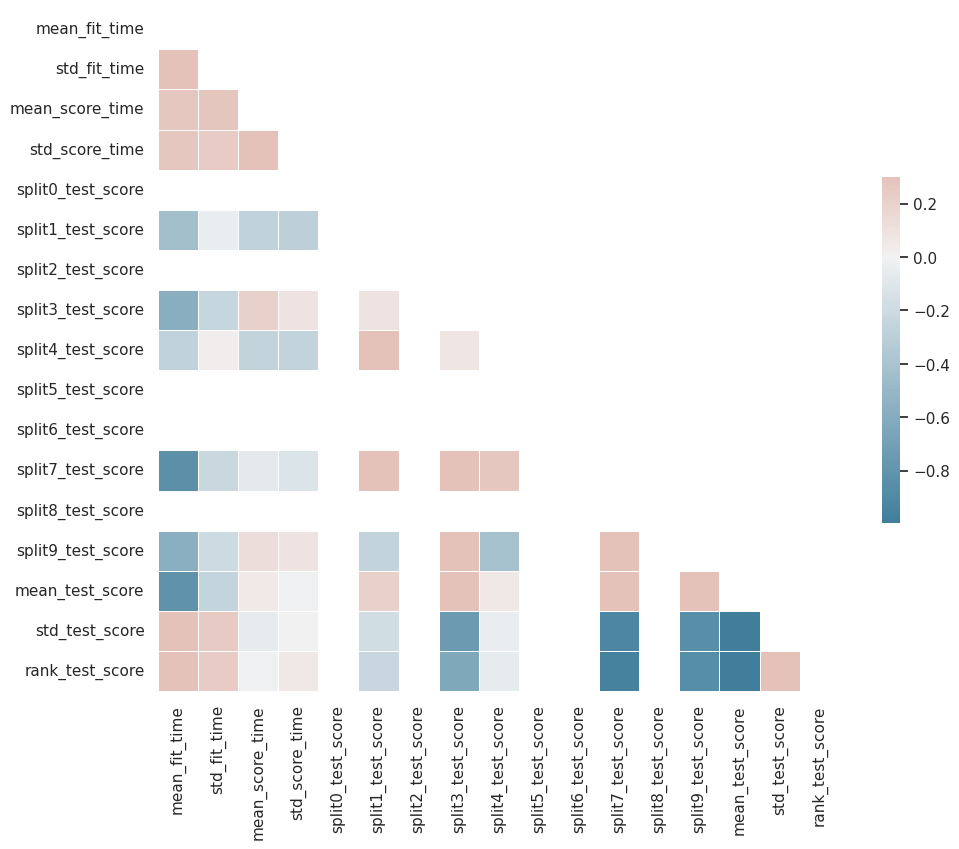

In [44]:
sns.set_theme(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})


Okay, ahora ustedes pueden ver aquí. Sí, ya tenemos nuestras tres variables: max_depth, min_samples_leaf, min_samples_split. Y la escala de colores donde nos indica la relación que tiene una correlación positiva en escala de colores y una relación negativa.

Entonces, cuanto más intenso, más marrón, cuanto más intenso, también más azul. Cuando esté en el medio la correlación es débil.

Entonces por ejemplo, aquí nosotros podemos ver que nuestros datos prueba tienen una correlación casi nula. Si está en blanco aquí, es 0 y es una correlación nula con el max_depth, lo que quiere decir es que no interesa mucho los valores del max_depth para llegar al mismo resultado de precisión.

[11:01] El test sí tiene una correlación positiva un poco intensa porque cuanto más intenso el color, un poco más fuerte la correlación con el min_samples_leaf, una correlación positiva, una correlación poco débil con el min_samples_split, una correlación positiva, un poco débil con el min_samples_split, que es el tercer parámetro que hemos adicionado. Entonces, tal vez no tenga mucho que ver o no adicione mucho valor a nuestra optimización de nuestro modelo.

Vamos a ver, entonces con este nuevo hiper parámetro, cómo fue la combinación que nos trajo mejores resultados a nuestro algoritmo, a nuestro modelo. A ver, está ordenado en formato ***descendiente***, entonces miren, observen ustedes que estos primeros cinco valores nos arrojó la misma precisión para nuestro modelo.

In [36]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_sample_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.013015,0.002338
48,4,32,32,78.750993,78.672633,0.013460,0.002304
34,3,32,128,78.750993,78.672633,0.011400,0.002418
35,3,32,256,78.750993,78.672633,0.012126,0.002566
36,3,64,32,78.750993,78.672633,0.011274,0.002542


Y observen las últimas dos columnas, el tiempo de entrenamiento y el tiempo de score. Aunque todas estas cinco combinaciones nos trajo el mismo resultado, la misma precisión de nuestro modelo. Algunos fueron más rápidos que otros, no necesariamente el que está listado aquí como primero fue el más rápido.

[12:52] Hay que saber elegir cuál fue el más rápido, si es que vamos a tener la mejor precisión.

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_sample_leaf', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_split', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>,
        <Axes: xlabel='fit_time', ylabel='max_depth'>,
        <Axes: xlabel='score_time', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_sample_leaf'>,
        <Axes: xlabel='min_sample_leaf', ylabel='min_sample_leaf'>,
        <Axes: xlabel='min_samples_split', ylabel='min_sample_leaf'>,
        <Axes: xlabel='train', ylabel='min_sample_leaf'>,
        <Axes: xlabel='test', ylabel='min_sample_leaf'>,
        <Axes: xlabel='fit_time', ylabel='min_sample_leaf'>,
        <Axes: xlabel='score_time', ylabel='min_sample_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_split'>,
        <Axes: xlabel='min_sample_leaf', ylabel='min_samples_split'>,
        <Axes: xlabel='min_s

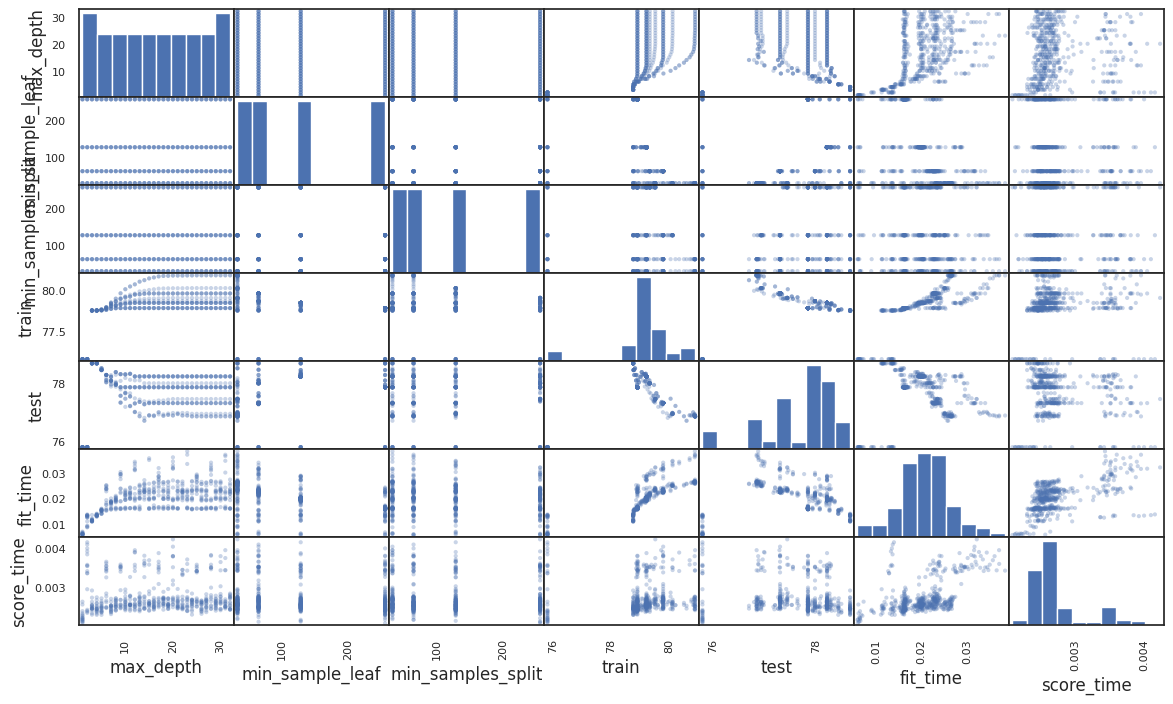

In [37]:
scatter_matrix(resultados, figsize=(14,8), alpha=0.3)

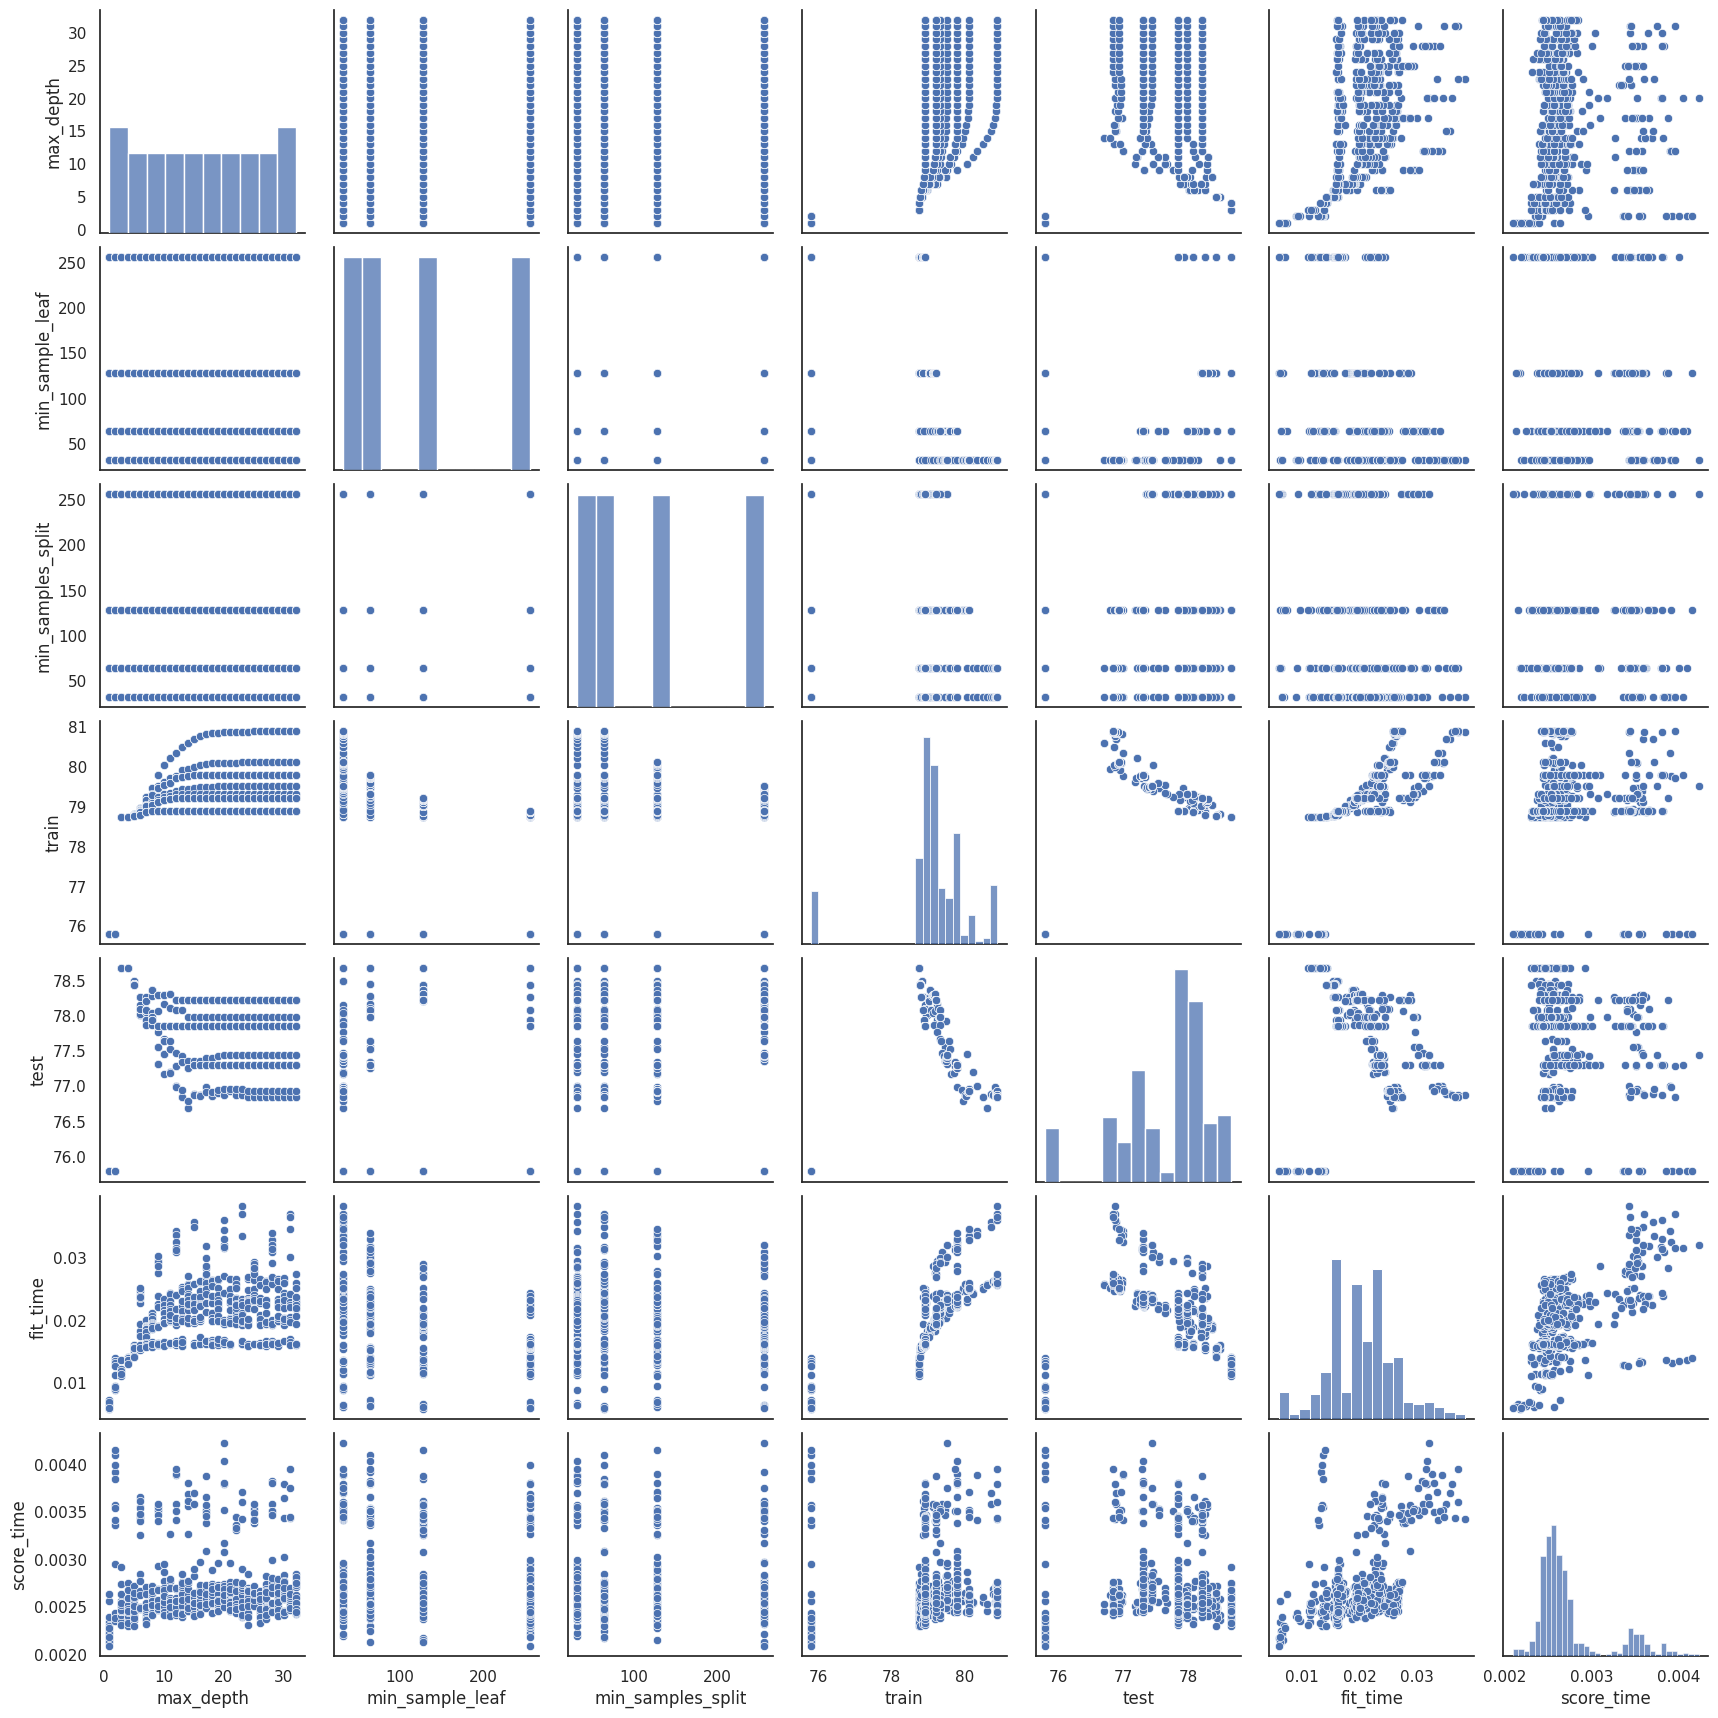

In [38]:
sns.pairplot(resultados)

# **Aula 4 - Búsqueda de hiper parámetros con GridSearchCV**

### ***Explorando espacio de hiper parámetros con GridSearchCV***


**Utilizando GridSearchCV**

Muy bien. En el último video aprendimos a realizar la búsqueda del espacio de parámetros de más de dos, de tres, inclusive hasta cuatro hiper parámetros podríamos haber realizado de esta misma manera, pero como les dije, existe una forma mucho más sencilla de realizar esto y es la propia biblioteca sklearn que nos ofrece este método.

Este método se llama ***GridSearchCV.*** Está es la página de la documentación del sklearn, donde nos explica un poco sobre este método. Este método realiza prácticamente lo mismo que el algoritmo que nosotros creamos en el último video, pero ya está implementado para realizar esto de una forma automática.

Simplemente tenemos que pasarle valores o los valores que deseamos que sean explorados para cada parámetro o hiper parámetro que este método realizará una búsqueda exhaustiva sobre todos estos valores. Interesante.

Lo importante es definir cuáles son los parámetros que vamos a utilizar para nuestra optimización.  Vamos a utilizar los mismos tres anteriores.

***Ahora vamos a mejorar un poco esta precisión. Vamos a adicionar un cuarto hiper parámetro. Me siento un poco aventurero el día de hoy.***

Estos son los cuatro hiper parámetros que vamos a pedirle a nuestra biblioteca, a nuestro método GridSearchCV que realice esta búsqueda exhaustiva dentro de estos valores que estamos indicando en la lista. ¿Cómo funciona? Vamos a crear nuestra variable buscar.

Los resultados, según la documentación, si buscamos los atributos, aquí, la parte de atributos, podemos ver que si llamamos a la al método cv_results o al atributo cv_results, tendremos un diccionario en formato NumPy, un array de diccionarios, ese es el formato, con los resultados del de nuestro método GridSearchCV, con los mejores modelos, los scores, resultados.

In [39]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth': [3, 5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

buscar = GridSearchCV(DecisionTreeClassifier(), espacio_de_parametros, cv = GroupKFold(n_splits=10))
buscar.fit(x_ord, y_ord, groups=datos.modelo)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012906,0.001710,0.002756,0.000277,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.012223,0.000715,0.002821,0.000454,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.012518,0.000802,0.002796,0.000228,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.012411,0.000979,0.002719,0.000314,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.013099,0.002430,0.002842,0.000603,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


Ahora miren qué fácil es trabajar ya con los resultados de este método GridSearchCV.

Si yo ejecuto esto de aquí, obtendré en pantalla cuál fue la mejor combinación de parámetros y el valor para cada uno de ellos con el cual obtuve la mejor precisión de mi modelo.

In [40]:
print(buscar.best_params_)
print(buscar.best_score_ *100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


Incluso puedo colocar otro print aquí y puedo preguntar cuál fue el mejor score. Nuevamente buscar y el atributo en este caso es best_score_ subguión, lo voy a multiplicar por 100 para ya traerlo en porcentaje, observen. Con esta combinación de criterios, el mejor score posible fue 78.67.

okay, estos son los parámetros, este es el score. **"¿Cómo puedo accesar al modelo en sí, a la clasificación, al modelo?”** De una forma muy sencilla también.

In [41]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [42]:
from sklearn.metrics import accuracy_score

prediccion = mejor.predict(x_ord)
accuracy = accuracy_score(prediccion, y_ord) * 100
print('Accuracy para los datos fue %.2f%%' % accuracy)

Accuracy para los datos fue 78.75%


¿Será que es tan fácil así? ¿Será que ya podemos indicar para nuestros clientes que este es el mejor modelo y este es el accuracy que van a obtener la precisión que van a obtener en el mundo real? Utilizando validación cruzada, tenemos que tener un poco de cuidado para informar esta precisión.

[14:14] Tenemos que realizar un paso más antes para tener una seguridad mayor de que esta realmente es la precisión para el mundo real.

# **Aula 05 - Nested Cross Validation y validando el modelo elegido.**

## **Nested Cross Validation y validando el mejor modelo**

Parte final del entrenamiento, así que presten mucha atención a este último capítulo porque vamos a revelar cuál es el último paso para finalmente decir que hemos optimizado nuestro modelo a través de hiper parámetros, así que mucha atención.

Nosotros hemos hecho todos los pasos, hemos utilizado GridSearchCV, hemos buscado el mejor estimador después con los resultados del GridSearchCv y hemos guardado este estimador, que es el mejor, en la variable mejor.

[00:46] Y encima de este modelo, que es el mejor, hemos hecho la predicción, así que supuestamente ese accuracy es el mejor. Pero no. ¿Por qué?

[00:56] Porque la documentación de Sklearn que es lo que ustedes están viendo aquí, es la página oficial, nos indica que si estamos utilizando optimización a través de hiper parámetros y estamos utilizando el método GridSearchCV, que es lo que hemos utilizado, es necesario realizar nuevamente una validación cruzada encima del mejor modelo que encontramos en el GridSearchCV.

Nosotros ya encontramos el mejor modelo en el GridSearchCV. Entonces la documentación nos indica que tenemos que realizar nuevamente una validación cruzada, utilizando ese mejor modelo. ¿Por qué? Porque en caso contrario nosotros estamos en un escenario optimista. Un escenario optimista no es el escenario real. Es como decir que solamente ese escenario va a suceder en la vida real y sabemos que no es así.

Así que la documentación nos exige utilizar esta función o método cross_val_score, que es una doble validación cruzada encima de nuestro mejor modelo, es decir, es lo que vamos a aprender el día de hoy, nested cross-validation o doble validación cruzada.

### **Escenario real**

*Primero, el método cross_val_score, esta es una alerta, este método no acepta una validación cruzada que haya utilizado el GroupDFold como atributo, como partición y lastimosamente eso es lo que hemos utilizado. Nosotros hemos utilizado GroupKFold, entonces tenemos que cambiar ese GroupKFold para una partición KFold.*

Estamos ejecutando nuestra primera validación cruzada, esto ya lo habíamos visto en el video anterior, así que ya tenemos la primera. ¿Ahora qué podemos hacer ahora?

In [45]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth': [3, 5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

buscar = GridSearchCV(DecisionTreeClassifier(), espacio_de_parametros, cv = KFold(n_splits=5, shuffle=True ))
buscar.fit(x_ord, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011598,0.001160,0.002693,0.000213,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.010866,0.000146,0.002609,0.000044,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.011275,0.000485,0.003681,0.001694,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.011270,0.000600,0.003002,0.000228,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.012110,0.000543,0.003087,0.000421,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


Ahora sí cumplimos los primeros requisitos, una validación cruzada que no utilice GroupKFold, ya lo tenemos. Ahora vamos a aplicar la segunda validación cruzada. Primero, vamos a importar del sklearn.model_selection, vamos a importar esta función que nos indica la documentación: cross_val_score.

Ejecutemos esto y nos va a realizar la segunda validación cruzada.

[06:39] Esto puede demorar un poco, pero quiero que entiendan que acaba de seleccionar el mejor modelo que obtuvimos en la primera validación cruzada y está realizando ahora la segunda variación cruzada, es decir, coge ese modelo, lo aplica nuevamente sobre los datos y obtiene nuevos valores de predicción para saber si realmente era 0.75 o nosotros estábamos viendo algún bias.

***Bias es una desviación sobre el sobre el resultado real con los datos reales.*** Muy bien, acabo de terminar. Entonces ustedes pueden ver que le pedimos a nuestra cross_val_score, nuestra segunda validación cruzada, 5 divisiones sobre el mejor modelo y nos está devolviendo las 5 predicciones de cada una de estas 5 divisiones.

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(buscar, x_ord, y_ord, cv=KFold(n_splits=5, shuffle=True))
scores

array([0.7795, 0.7905, 0.786 , 0.791 , 0.788 ])

Entonces ustedes pueden ver que le pedimos a nuestra cross_val_score, nuestra segunda validación cruzada, 5 divisiones sobre el mejor modelo y nos está devolviendo las 5 predicciones de cada una de estas 5 divisiones.

[07:27] Ustedes pueden ver un intervalo diferente al que obtuvimos en la primera validación cruzada, entonces vamos a crear nuestra función imprime_scores, que es nada más y nada menos que selecciona este array de 5 valores y crea una media de los scores y una media de la desviación estándar y ya está.

In [48]:
def imprime_score(scores):
  media = scores.mean() * 100
  desviacion = scores.std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [49]:
imprime_score(scores)

Accuracy media 78.70
Intervalo [77.87, 79.53]


***Esto sí, es la performance o la precisión real sobre los datos reales.***

*Con esto sí habremos optimizado nuestro modelo a través de hiper parámetros. Interesante. No era solamente utilizar una validación cruzada, sino que tendríamos que utilizar una segunda. Ahora, ¿qué más podremos hacer aquí? Podemos nuevamente, ahora que ya tenemos el mejor modelo sobre el mejor modelo, es decir, el mejor del mejor, podemos también mostrarlo en pantalla.*

In [50]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

Esta es la mejor combinación sobre el mejor modelo que obtuvimos en la primera validación cruzada. Esto sí, mis amigos, es el escenario real.

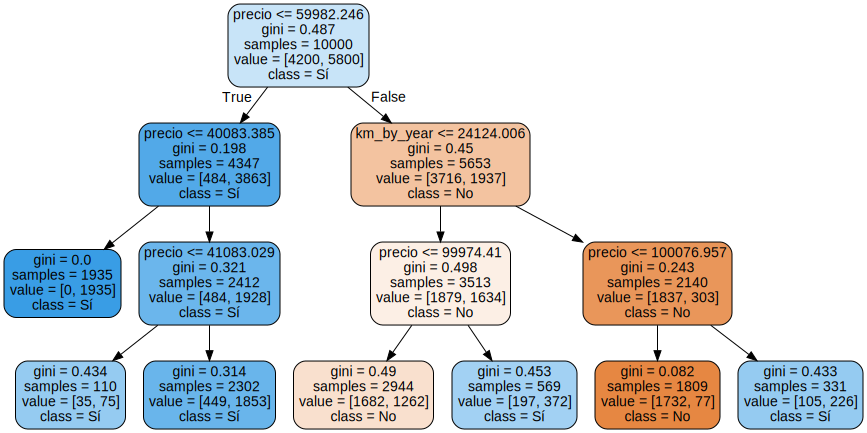

In [51]:
features = x_ord.columns
dot_data = export_graphviz(mejor, out_file=None, filled=True, rounded=True, class_names=['No', 'Sí'], feature_names = features)
graph = graphviz.Source(dot_data)
graph

Min_samples y min_samples_split de 32 y el criterio ‘gini’. Vamos a ver si se cumple esto en el modelo: profundidad 3. 1, 2 y 3 y al final las hojitas. Así es, se cumplió. Criterion = ‘gini’, para toda. Aquí lo pueden ver: criterion gini, criterion gini, criterion gini para todas. Los samples o las muestras para cada uno de los nodos mayor a 32 y de las hojas también, mayor a 32.

[10:32] Entonces sí estamos visualizando el modelo, el árbol de decisión que tiene relación con nuestro mejor modelo. Okay, y aquí están todas las reglas, las clasificaciones y los resultados si el carro será vendido o si no será vendido. Entonces mis amigos y amigas, con esto ya podemos tener seguridad de que estamos aplicando la mejor optimización de nuestro modelo y que estamos viendo el mejor resultado para nuestro escenario real.